<img src="1.jpg" style="width:400px;height:500px;">

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [170]:
data = pd.read_csv(r'C:\Users\laphouse\Desktop\Shai_Training\athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## EDA and Data Cleaning

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [172]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [173]:
# remove duplicates
df = data.drop_duplicates()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [114]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [115]:
# Filling the missing data
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())


C:\Users\laphouse\AppData\Local\Temp\ipykernel_13444\914905872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].mean())
C:\Users\laphouse\AppData\Local\Temp\ipykernel_13444\914905872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].fillna(df['Height'].mean())
C:\Users\laphouse\AppData\Local\Temp\ipykernel_13444\914905872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [116]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

## Data Analysis and Visualization

In [117]:
# Displaying the number of Sports played in Olympics
sports_numb = df.Sport.nunique()
print(f'There are {sports_numb} Sports displayed in Olympics')

There are 66 Sports displayed in Olympics


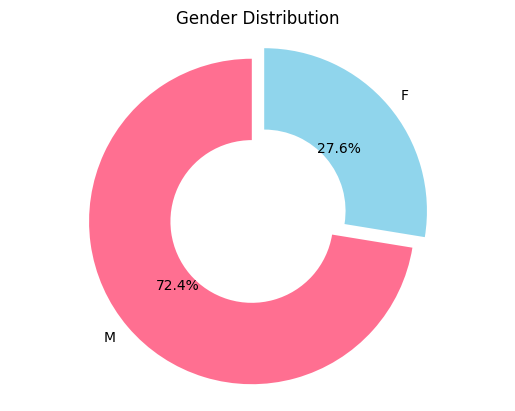

In [118]:
# Gender Distribution

explode = (0.1, 0)  # Explode the first slice 

fig, ax = plt.subplots()
sex_count= df['Sex'].value_counts()
ax.pie(sex_count, explode=explode, labels=sex_count.index, colors=['#FF6F91', '#90D5EC'], autopct='%1.1f%%',
       startangle=90, wedgeprops={'width':0.5})  

ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

In [119]:
# Number of Medals won by Male and Female
df.groupby("Sex")["Medal"].count()

Sex
F    11253
M    28519
Name: Medal, dtype: int64

Text(0.5, 1.0, ' Number of Medals won by Male and Female')

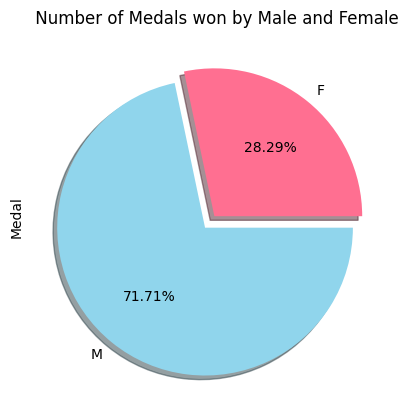

In [120]:
df.groupby('Sex').Medal.count().plot(kind = 'pie',autopct='%0.02f%%',colors=['#FF6F91', '#90D5EC'],
                                     explode=(0,0.1),shadow=True)
plt.title(" Number of Medals won by Male and Female")

The number of males who have won a medal is much greater than that of females.

In [121]:
sport_counts = df['Sport'].value_counts()
sport_counts

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10827
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

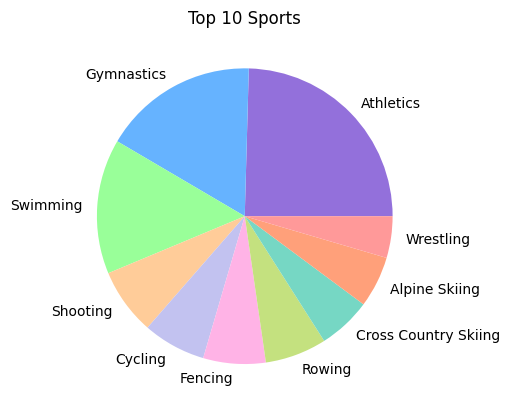

In [122]:
# Displaying the top 10 sports in the Olympics
top_sports = sport_counts.head(10)
plt.pie(top_sports, labels=top_sports.index, colors=  ['#9370DB', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', 
          '#ffb3e6', '#c4e17f', '#76d7c4', '#ffa07a','#ff9999'])
plt.title('Top 10 Sports')
plt.show()

As we can see from the pie plot above, Athletics is the most popular sport

In [123]:
medal_counts = df['Medal'].value_counts()


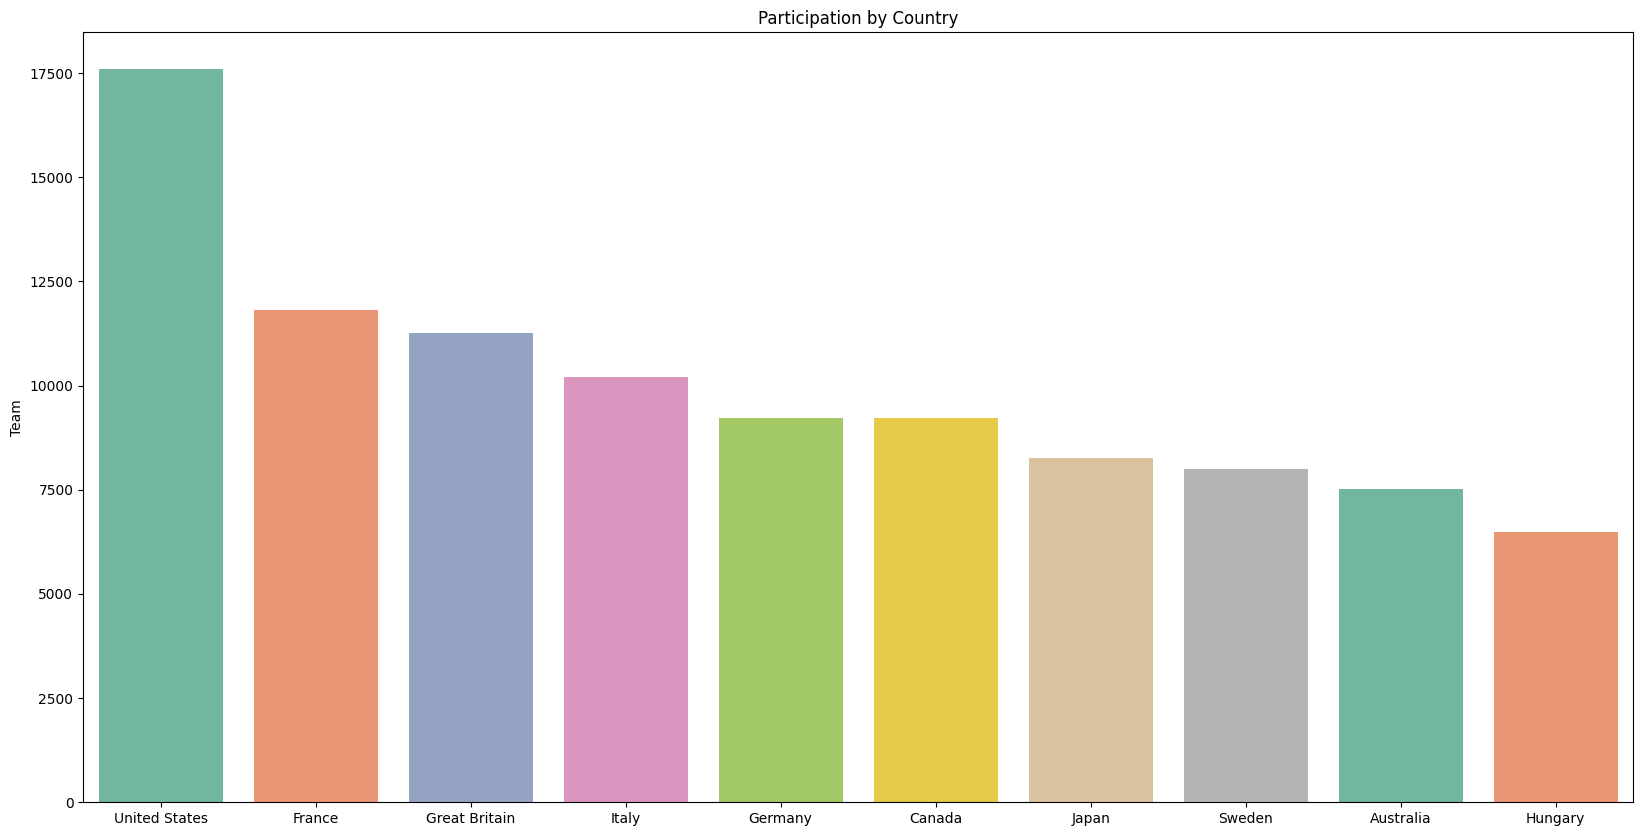

In [124]:
fig = plt.figure(figsize=(20,10))
team_counts = df['Team'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(data = df, x=team_counts.index, y = team_counts,palette ="Set2")
plt.title("Participation by Country")
plt.show()

The country with the largest participation of players is United Sates, followed by France and Great Britain.

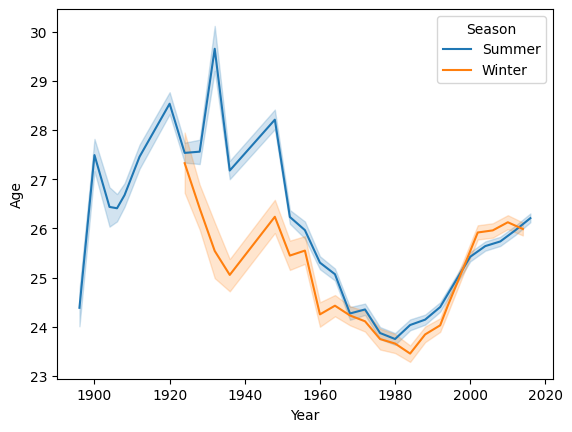

In [125]:
sns.lineplot(data = df, x="Year", y ="Age", hue ="Season")
plt.show()

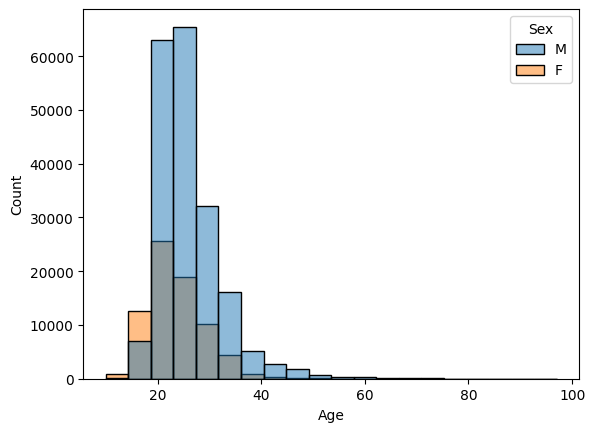

In [126]:
# Distribution of Age by Gender
sns.histplot(data = df, x='Age', hue ='Sex', bins= 20)
plt.show()

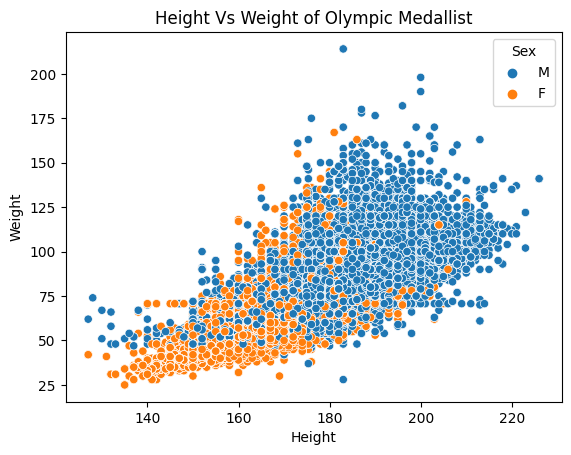

In [127]:
sns.scatterplot(data= df, x='Height',y ='Weight', hue ='Sex')
plt.title("Height Vs Weight of Olympic Medallist")
plt.show()

In [156]:
winter = df[df['Season']=='Winter'][['Team', 'Season']]
top_winter = winter['Team'].value_counts().sort_values(ascending = False).head(10)

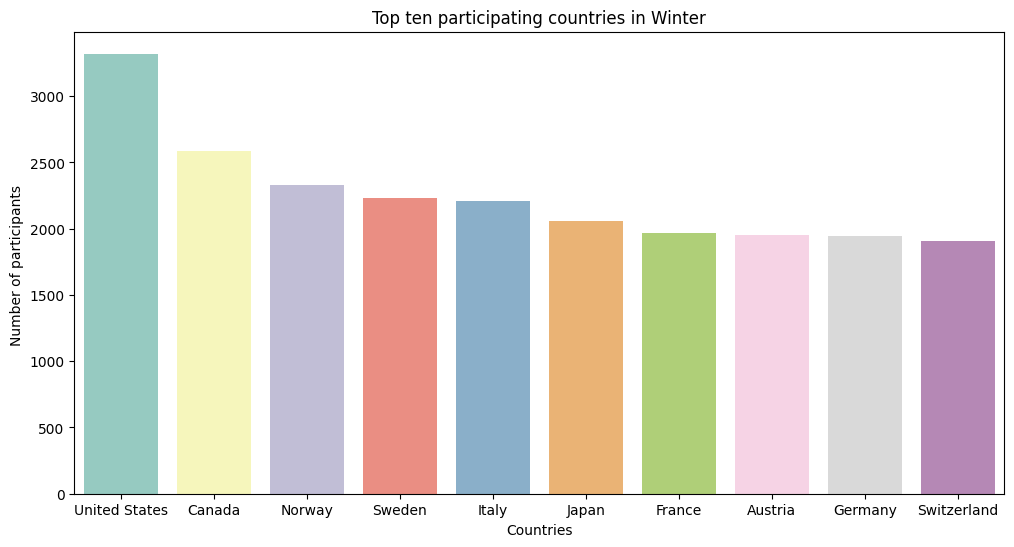

In [157]:
# Displaying the top participating countries in Winter
plt.figure(figsize=(12,6))
sns.barplot(data = df, x=top_winter.index, y =top_winter, palette ="Set3")
plt.xlabel("Countries")
plt.ylabel("Number of participants ")
plt.title("Top ten participating countries in Winter")
plt.show()

Most countries have participants in the Winter games are United States, Canada, and Norway.

In [158]:
summer = df[df['Season']=='Summer'][['Team', 'Season']]
top_summer = summer['Team'].value_counts().sort_values(ascending = False).head(10)

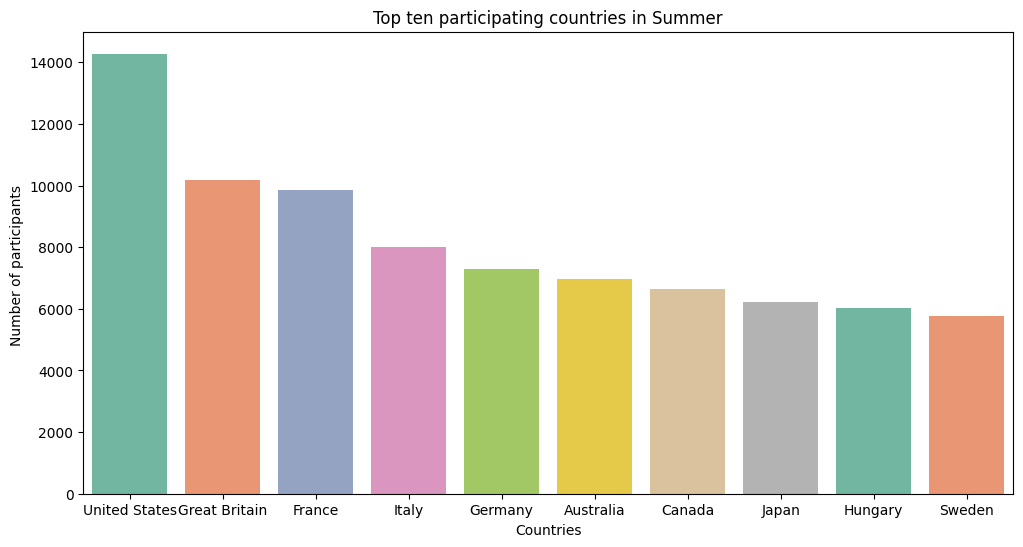

In [159]:
# Displaying the top participating countries in Summer
plt.figure(figsize=(12,6))
sns.barplot(data = df, x=top_summer.index, y =top_summer, palette ="Set2")
plt.xlabel("Countries")
plt.ylabel("Number of participants ")
plt.title("Top ten participating countries in Summer")
plt.show()

Most countries have participants in the Summer games are United States, Great Britain, and France.

In [160]:
top_gold = df[['Team', 'Medal']].copy()
top_gold = top_gold[top_gold['Medal']=='Gold']
top_gold = top_gold['Team'].value_counts().sort_values(ascending = False).head(10)

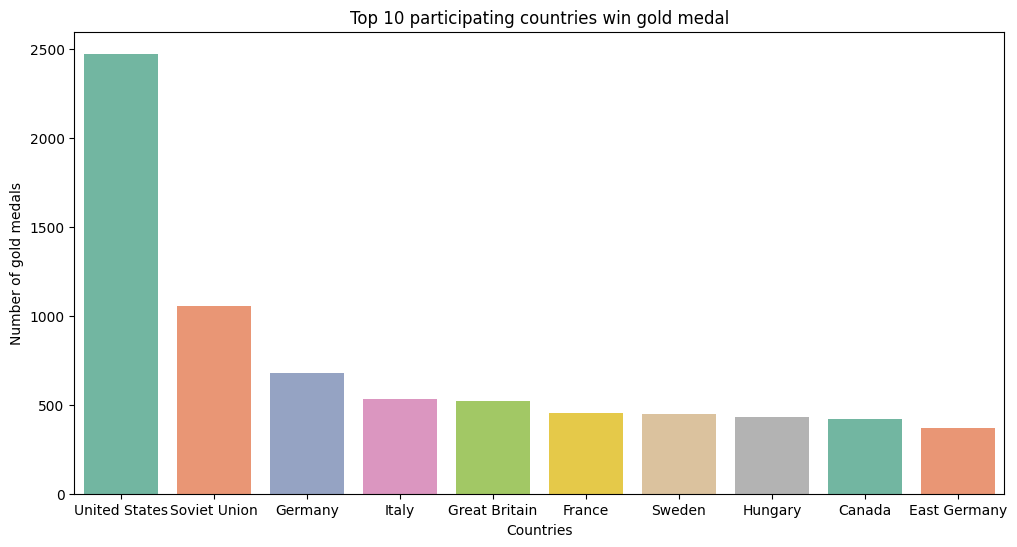

In [161]:
plt.figure(figsize=(12,6))
sns.barplot(x= top_gold.index, y = top_gold, palette ='Set2')
plt.xlabel("Countries")
plt.ylabel("Number of gold medals")
plt.title("Top 10 participating countries win gold medal")

plt.show()

The top participating countries won a gold medal are: United States, Soviet Union, and Germany

In [162]:
# no of medals per each Athelete
medal_table = pd.pivot_table(data=df , index=['Name', 'Sex'],values = "Medal",
               aggfunc='count', dropna = True, sort=False)

medal_table = medal_table.sort_values("Medal", ascending=False).head(10)
medal_table

,,Medal
Name,Sex,
"Michael Fred Phelps, II",M,28
Larysa Semenivna Latynina (Diriy-),F,18
Nikolay Yefimovich Andrianov,M,15
Edoardo Mangiarotti,M,13
Ole Einar Bjrndalen,M,13
Borys Anfiyanovych Shakhlin,M,13
Takashi Ono,M,13
"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,12
Sawao Kato,M,12


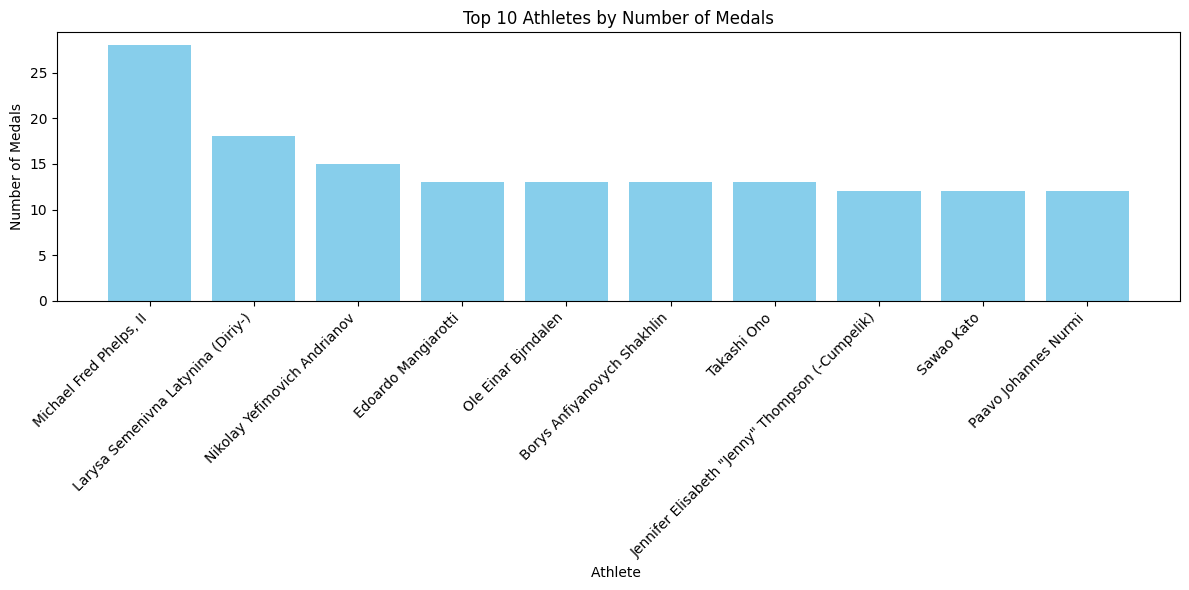

In [164]:
# Reset index to use 'Name' in the plot
medal_table = medal_table.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(medal_table['Name'] , medal_table['Medal'], color='skyblue')
plt.xlabel('Athlete ')
plt.ylabel('Number of Medals')
plt.title('Top 10 Athletes by Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

So, Michael Fred Phelps has the highest number of medals, followed by Larysa and Nikolay.